In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# IO

In [2]:
from PineBioML.preprocessing import IO

In [3]:
# Path
input_folder = "./input/"
output_folder = "./output/"
export_title = "example_basic "

In [4]:
x, y = IO.read_multiple_groups(
    file_path_list=[
        input_folder+ "example_group1.csv", # all samples from this file will have y = 0, because it is in the 1st place of the file path list.
        input_folder+ "example_group2.tsv", # all samples from this file will have y = 1, because it is in the 2nd place of the file path list.
    ],
    index_col=0
    )

# Train test split

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33, random_state=142, shuffle=True)

# Experiment

In [6]:
from PineBioML.preprocessing import Normalizer, Pass
from PineBioML.preprocessing.impute import knn_imputer, simple_imputer
from PineBioML.preprocessing.utils import feature_extension
from PineBioML.selection.ensemble import selector
from PineBioML.model.supervised import Classification
from sklearn.linear_model import LogisticRegression


# define the experiment pipeline
experiment = [
    ("MissingValueProcessing", {
        "mean": simple_imputer(threshold=1., strategy="mean")
        }),
    ("Standarization", {
        "PowerTransformer": Normalizer(method="PowerTransformer"), 
        "StandardScaler": Normalizer(method="StandardScaler"),
        }),
    ("FeatureExpansion", {
        "PCA * /": feature_extension(), 
        "None": Pass()
        }),
    ("Selection", {
        "ensemble":selector(RF_trees=256, z_importance_threshold = 1), 
        "None": Pass()
        }),
    ("Modeling", {
#        "LgisticRegression": LogisticRegression(penalty = None),
 #       "ElasticNetLogisticRegression": Classification.ElasticLogit_tuner(target = "roc_auc", validate_penalty=True),
        "rbf-SVM": Classification.SVM_tuner(target="f1", validate_penalty=True),
   #     "DecisionTree": Classification.DecisionTree_tuner(target="neg_log_loss", validate_penalty=True),
        "RandomForest": Classification.RandomForest_tuner(validate_penalty=True),
    #    "AdaBoost": Classification.AdaBoost_tuner(target="recall", validate_penalty=True),
     #   "XGBoost": Classification.XGBoost_tuner(validate_penalty=True),
      #  "LightGBM": Classification.LighGBM_tuner(validate_penalty=True),
        }),
]

In [7]:
from PineBioML.model.utils import Pine

pine_automl = Pine(experiment)
result = pine_automl.do_experiment(x_train, y_train, x_valid, y_valid)


Using  c45  to select.


100%|██████████| 158/158 [00:00<00:00, 418.22it/s]
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


c45  is done.

Using  RF_gini  to select.


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:    0.2s finished


RF_gini  is done.

Using  AdaBoost  to select.
I don't have a progress bar but I am running
AdaBoost  is done.

Using  Lasso_Bisection  to select.
Lasso_Bisection  is done.

Using  multi_Lasso  to select.


C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.233e-02, tolerance: 3.350e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.941e-02, tolerance: 3.350e-03
  model = cd_fast.enet_coordinate_descent(


multi_Lasso  is done.

Using  SVM  to select.
SVM  is done.

Using  XGboost  to select.
XGboost  is done.

Using  Lightgbm  to select.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 67, number of negative: 67
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7324
[LightGBM] [Info] Number of data points in the train set: 134, number of used features: 158
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: Unde

    optuna is better, best trial:  34
RandomForestClassifier(ccp_alpha=0.00218945854492653, class_weight='balanced',
                       max_depth=8, max_samples=0.5629253775166825,
                       min_samples_leaf=3, n_estimators=91, n_jobs=-1,
                       oob_score=True, random_state=12702) 

Using  c45  to select.


100%|██████████| 100/100 [00:00<00:00, 256.22it/s]
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


c45  is done.

Using  RF_gini  to select.


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:    0.4s finished


RF_gini  is done.

Using  AdaBoost  to select.
I don't have a progress bar but I am running
AdaBoost  is done.

Using  Lasso_Bisection  to select.
Lasso_Bisection  is done.

Using  multi_Lasso  to select.
multi_Lasso  is done.

Using  SVM  to select.
SVM  is done.

Using  XGboost  to select.
XGboost  is done.

Using  Lightgbm  to select.
[LightGBM] [Info] Number of positive: 67, number of negative: 67
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4642
[LightGBM] [Info] Number of data points in the train set: 134, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 158/158 [00:00<00:00, 209.97it/s]
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


c45  is done.

Using  RF_gini  to select.


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:    0.4s finished


RF_gini  is done.

Using  AdaBoost  to select.
I don't have a progress bar but I am running
AdaBoost  is done.

Using  Lasso_Bisection  to select.
Lasso_Bisection  is done.

Using  multi_Lasso  to select.


C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.652e-02, tolerance: 3.350e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.002e-02, tolerance: 3.350e-03
  model = cd_fast.enet_coordinate_descent(


multi_Lasso  is done.

Using  SVM  to select.
SVM  is done.

Using  XGboost  to select.
XGboost  is done.

Using  Lightgbm  to select.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 67, number of negative: 67
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7320
[LightGBM] [Info] Number of data points in the train set: 134, number of used features: 158
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: Unde

    optuna is better, best trial:  7
RandomForestClassifier(ccp_alpha=0.0018811946100596578, class_weight='balanced',
                       max_depth=3, max_samples=0.6641875808068786,
                       n_estimators=87, n_jobs=-1, oob_score=True,
                       random_state=12381) 

Using  c45  to select.


100%|██████████| 100/100 [00:00<00:00, 297.56it/s]
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


c45  is done.

Using  RF_gini  to select.


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:    0.2s finished


RF_gini  is done.

Using  AdaBoost  to select.
I don't have a progress bar but I am running
AdaBoost  is done.

Using  Lasso_Bisection  to select.
Lasso_Bisection  is done.

Using  multi_Lasso  to select.
multi_Lasso  is done.

Using  SVM  to select.
SVM  is done.

Using  XGboost  to select.
XGboost  is done.

Using  Lightgbm  to select.
[LightGBM] [Info] Number of positive: 67, number of negative: 67
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4640
[LightGBM] [Info] Number of data points in the train set: 134, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: Unde

    optuna is better, best trial:  2
RandomForestClassifier(ccp_alpha=0.0158555519206127, class_weight='balanced',
                       max_depth=8, max_samples=0.5416945060344001,
                       n_estimators=97, n_jobs=-1, oob_score=True,
                       random_state=13080) 



In [8]:
# print the results
result

,MissingValueProcessing,Standarization,FeatureExpansion,Selection,Modeling,train_precision,train_recall,train_f1-score,train_support,train_sensitivity,...,cv_mcc,cv_auc,test_precision,test_recall,test_f1-score,test_support,test_sensitivity,test_specificity,test_mcc,test_auc
0,mean,PowerTransformer,PCA * /,ensemble,rbf-SVM,0.721311,0.656716,0.687500,67.0,0.656716,...,0.335513,0.736095,0.609756,0.757576,0.675676,33.0,0.757576,0.515152,0.281113,0.645546
1,mean,PowerTransformer,PCA * /,ensemble,RandomForest,0.750000,0.716418,0.732824,67.0,0.716418,...,0.297137,0.728360,0.634146,0.787879,0.702703,33.0,0.787879,0.545455,0.343582,0.708907
2,mean,PowerTransformer,PCA * /,None,rbf-SVM,1.000000,1.000000,1.000000,67.0,1.000000,...,-0.006281,0.491631,0.541667,0.393939,0.456140,33.0,0.393939,0.666667,0.062994,0.628558
3,mean,PowerTransformer,PCA * /,None,RandomForest,1.000000,1.000000,1.000000,67.0,1.000000,...,0.099808,0.602620,0.611111,0.666667,0.637681,33.0,0.666667,0.575758,0.243432,0.613407
4,mean,PowerTransformer,None,ensemble,rbf-SVM,0.721311,0.656716,0.687500,67.0,0.656716,...,0.335513,0.736095,0.609756,0.757576,0.675676,33.0,0.757576,0.515152,0.281113,0.645546
5,mean,PowerTransformer,None,ensemble,RandomForest,0.750000,0.716418,0.732824,67.0,0.716418,...,0.297137,0.728360,0.634146,0.787879,0.702703,33.0,0.787879,0.545455,0.343582,0.708907
6,mean,PowerTransformer,None,None,rbf-SVM,1.000000,1.000000,1.000000,67.0,1.000000,...,0.029781,0.478360,0.555556,0.454545,0.500000,33.0,0.454545,0.636364,0.092450,0.628099
7,mean,PowerTransformer,None,None,RandomForest,1.000000,1.000000,1.000000,67.0,1.000000,...,0.303686,0.674176,0.578947,0.666667,0.619718,33.0,0.666667,0.515152,0.183942,0.648301
8,mean,StandardScaler,PCA * /,ensemble,rbf-SVM,0.783333,0.701493,0.740157,67.0,0.701493,...,0.303104,0.739645,0.560976,0.696970,0.621622,33.0,0.696970,0.454545,0.156174,0.605142
9,mean,StandardScaler,PCA * /,ensemble,RandomForest,0.670455,0.880597,0.761290,67.0,0.880597,...,0.424087,0.751860,0.630435,0.878788,0.734177,33.0,0.878788,0.484848,0.395628,0.719927


In [9]:
# sort according to test_auc
result.sort_values("test_auc")

,MissingValueProcessing,Standarization,FeatureExpansion,Selection,Modeling,train_precision,train_recall,train_f1-score,train_support,train_sensitivity,...,cv_mcc,cv_auc,test_precision,test_recall,test_f1-score,test_support,test_sensitivity,test_specificity,test_mcc,test_auc
11,mean,StandardScaler,PCA * /,None,RandomForest,1.000000,0.985075,0.992481,67.0,0.985075,...,0.212637,0.601014,0.555556,0.454545,0.500000,33.0,0.454545,0.636364,0.092450,0.584022
8,mean,StandardScaler,PCA * /,ensemble,rbf-SVM,0.783333,0.701493,0.740157,67.0,0.701493,...,0.303104,0.739645,0.560976,0.696970,0.621622,33.0,0.696970,0.454545,0.156174,0.605142
3,mean,PowerTransformer,PCA * /,None,RandomForest,1.000000,1.000000,1.000000,67.0,1.000000,...,0.099808,0.602620,0.611111,0.666667,0.637681,33.0,0.666667,0.575758,0.243432,0.613407
10,mean,StandardScaler,PCA * /,None,rbf-SVM,1.000000,1.000000,1.000000,67.0,1.000000,...,-0.008728,0.487067,0.480000,0.363636,0.413793,33.0,0.363636,0.606061,-0.031235,0.617080
6,mean,PowerTransformer,None,None,rbf-SVM,1.000000,1.000000,1.000000,67.0,1.000000,...,0.029781,0.478360,0.555556,0.454545,0.500000,33.0,0.454545,0.636364,0.092450,0.628099
2,mean,PowerTransformer,PCA * /,None,rbf-SVM,1.000000,1.000000,1.000000,67.0,1.000000,...,-0.006281,0.491631,0.541667,0.393939,0.456140,33.0,0.393939,0.666667,0.062994,0.628558
14,mean,StandardScaler,None,None,rbf-SVM,1.000000,1.000000,1.000000,67.0,1.000000,...,0.048170,0.474979,0.586207,0.515152,0.548387,33.0,0.515152,0.636364,0.152641,0.629936
12,mean,StandardScaler,None,ensemble,rbf-SVM,0.737705,0.671642,0.703125,67.0,0.671642,...,0.319484,0.744294,0.600000,0.727273,0.657534,33.0,0.727273,0.515152,0.248069,0.636364
0,mean,PowerTransformer,PCA * /,ensemble,rbf-SVM,0.721311,0.656716,0.687500,67.0,0.656716,...,0.335513,0.736095,0.609756,0.757576,0.675676,33.0,0.757576,0.515152,0.281113,0.645546
4,mean,PowerTransformer,None,ensemble,rbf-SVM,0.721311,0.656716,0.687500,67.0,0.656716,...,0.335513,0.736095,0.609756,0.757576,0.675676,33.0,0.757576,0.515152,0.281113,0.645546


In [10]:
# save the result
result.to_csv("./output/example_Pine_result.csv")

# Pick a model and save it

In [11]:
# notice that the model is not fitted yet
model = pine_automl.recall_model(id = 9)

In [12]:
# fit the model
model.fit(x_train, y_train)
y_valid_prob = model.predict_proba(x_valid)[:,1]

Using  c45  to select.


100%|██████████| 158/158 [00:00<00:00, 302.87it/s]
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


c45  is done.

Using  RF_gini  to select.


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:    0.3s finished


RF_gini  is done.

Using  AdaBoost  to select.
I don't have a progress bar but I am running
AdaBoost  is done.

Using  Lasso_Bisection  to select.
Lasso_Bisection  is done.

Using  multi_Lasso  to select.


C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.652e-02, tolerance: 3.350e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.002e-02, tolerance: 3.350e-03
  model = cd_fast.enet_coordinate_descent(


multi_Lasso  is done.

Using  SVM  to select.
SVM  is done.

Using  XGboost  to select.
XGboost  is done.

Using  Lightgbm  to select.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 67, number of negative: 67
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7320
[LightGBM] [Info] Number of data points in the train set: 134, number of used features: 158
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

### summary


 
              precision    recall  f1-score   support

         0.0       0.80      0.48      0.60        33
         1.0       0.63      0.88      0.73        33

    accuracy                           0.68        66
   macro avg       0.72      0.68      0.67        66
weighted avg       0.72      0.68      0.67        66

sensitivity: 0.879
specificity: 0.485


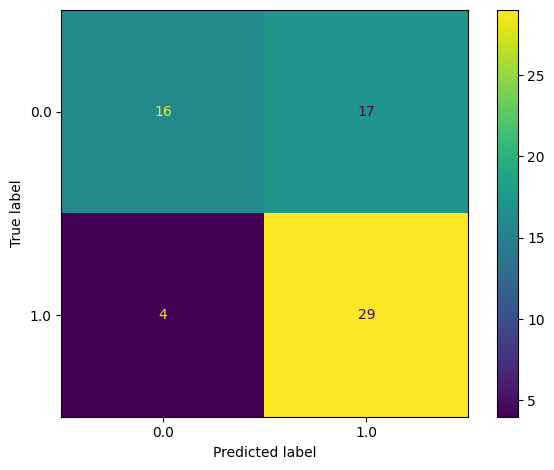

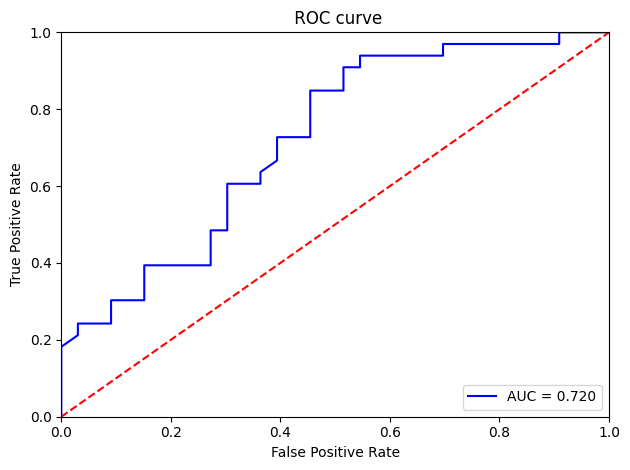

In [13]:
from PineBioML.report.utils import classification_summary

classification_summary(y_valid, y_valid_prob)

### save the model

In [14]:
from PineBioML import IO

In [15]:
IO.save_model(model, "./output/models/", "model9", overide=True)